In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [3]:
stroke=pd.read_csv("healthcare.csv")
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
stroke.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [5]:
stroke.shape

(5110, 12)

In [6]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
s=stroke[stroke["stroke"]==1]

In [8]:
s

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
244,17739,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,49669,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,27153,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,34060,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


In [9]:
stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [10]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
stroke["bmi"]=stroke["bmi"].fillna(stroke["bmi"].mean())

In [12]:
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
stroke.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002999,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.002999,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


In [14]:
stroke.drop('id',axis=1,inplace=True)

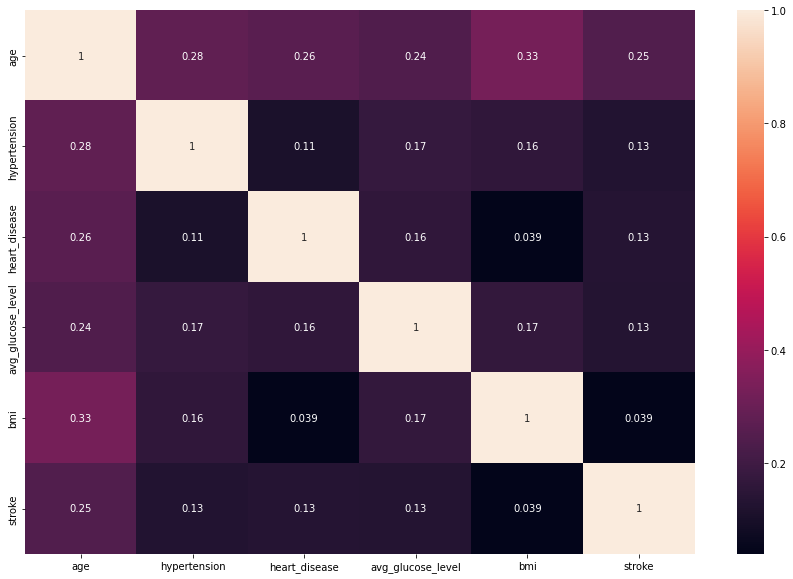

In [15]:
corr=stroke.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [55]:
x=stroke["stroke"].value_counts(normalize=True)*100
label_stroke=x.keys().map({0:"No_Stroke",1:"Stroke"})
label_stroke,x

(Index(['No_Stroke', 'Stroke'], dtype='object'),
 0    95.127202
 1     4.872798
 Name: stroke, dtype: float64)

C:\Users\Rupendra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


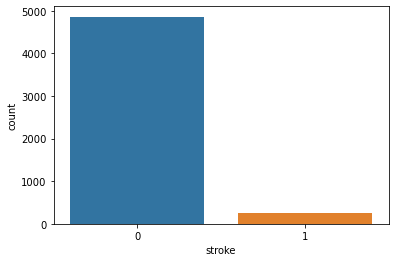

In [16]:
sns.countplot(stroke['stroke'])

([<matplotlib.patches.Wedge at 0x1f950841070>,
 [Text(-2.1742723534906996, 0.3354694216258975, 'No_Stroke'),
  Text(2.17427241238238, -0.33546903993201144, 'Stroke')],
 [Text(-1.1859667382676542, 0.18298332088685318, '95.13%'),
  Text(1.1859667703903891, -0.18298311269018802, '4.87%')])

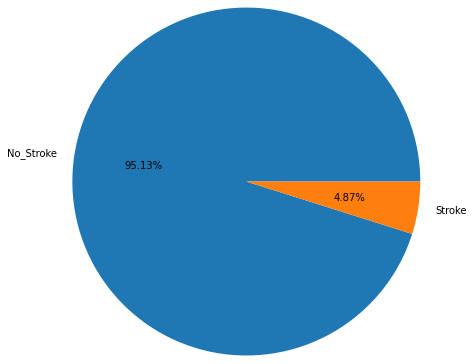

In [17]:
plt.pie(x=x,labels=label_stroke,radius=2,autopct="%1.2f%%")

Distribution

In [36]:
def bar_plot(variable):
    var=stroke[variable]
    variable_values=var.value_counts()
    
    plt.figure(figsize=(9,3))
    plt.bar(variable_values.index,variable_values)
    plt.ylabel("Frequency")
    plt.xlabel(variable)
    plt.show()
    print("{}:\n{}".format(variable,variable_values))

In [114]:
categorical=(stroke.dtypes=="object")
categorical_list=(categorical[categorical].index)
categorical_list,categorical[categorical]

(Index(['gender', 'ever_married', 'work_type', 'Residence_type',
        'smoking_status'],
       dtype='object'),
 gender            True
 ever_married      True
 work_type         True
 Residence_type    True
 smoking_status    True
 dtype: bool)

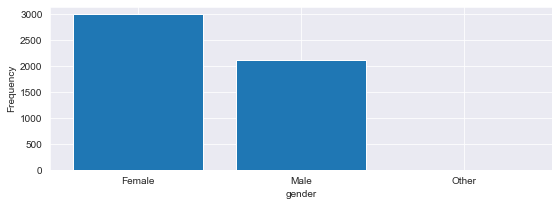

gender:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


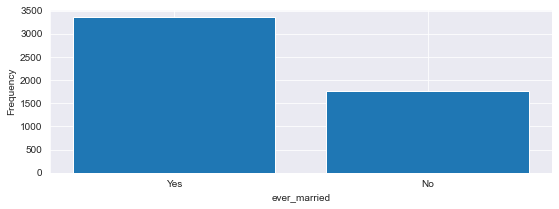

ever_married:
Yes    3353
No     1757
Name: ever_married, dtype: int64


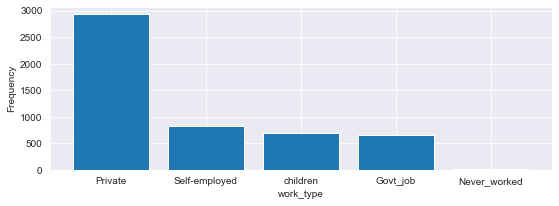

work_type:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


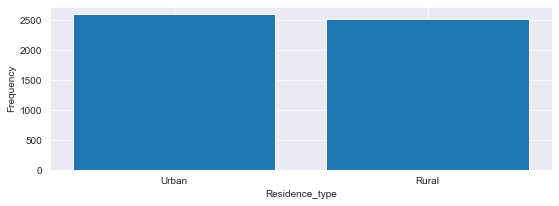

Residence_type:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


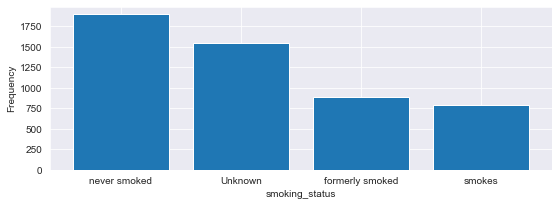

smoking_status:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [37]:
sns.set_style("darkgrid")
categoricale_variables=['gender','ever_married','work_type','Residence_type','smoking_status']
for c in categoricale_variables:
    bar_plot(c)

# Stroke rate by gender

In [142]:
x=pd.crosstab(stroke['gender'],stroke['stroke'],normalize=True).round(2)
x

stroke,0,1
gender,,
Female,0.56,0.03
Male,0.39,0.02
Other,0.00,0.00


In [129]:

#=stroke[["gender","stroke"]].value_counts(normalize=True)*100


#x=pd.crosstab(stroke['gender'],stroke['stroke'],normalize=True).round(2)

v=stroke.groupby(['gender','stroke']).size().reset_index()
#plt.figure(figsize = (8,8))
#plt.pie(x=x, labels=['Female','Male','other'] ,autopct='%1.2f%%')
#plt.title("Stroke rate by Gender",color = 'black',fontsize = 25)
v

,gender,stroke,0
0,Female,0,2853
1,Female,1,141
2,Male,0,2007
3,Male,1,108
4,Other,0,1


In [133]:
v.columns=['gender','stroke','gr']
v.head()

,gender,stroke,gr
0,Female,0,2853
1,Female,1,141
2,Male,0,2007
3,Male,1,108
4,Other,0,1


In [138]:
label=list(v['gender'].values)
label

['Female', 'Female', 'Male', 'Male', 'Other']

([<matplotlib.patches.Wedge at 0x183d0499b50>,
 [Text(-0.2004035981335128, 1.0815906794416923, 'Female'),
  Text(-0.9890026780178609, -0.48153266023552294, 'Female'),
  Text(0.22164191419907742, -1.0774390293052174, 'Male'),
  Text(1.0974855542106619, -0.07433342652479329, 'Male'),
  Text(1.0999997920196642, -0.0006764293722258313, 'Other')],
 [Text(-0.10931105352737061, 0.5899585524227412, '55.83%'),
  Text(-0.5394560061915604, -0.2626541783102852, '2.76%'),
  Text(0.12089558956313312, -0.587694015984664, '39.28%'),
  Text(0.5986284841149063, -0.040545505377159965, '2.11%'),
  Text(0.5999998865561804, -0.0003689614757595443, '0.02%')])

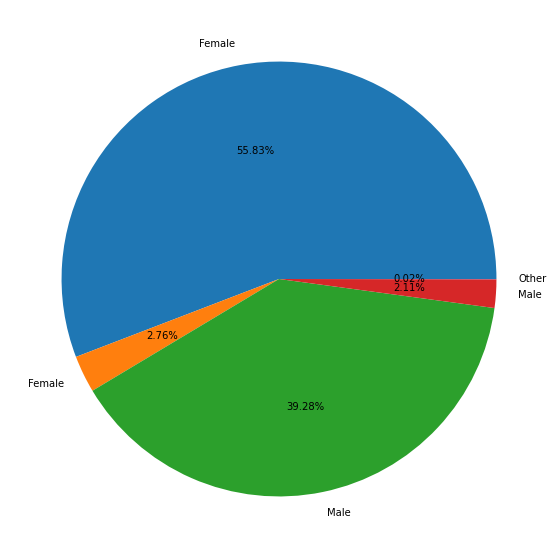

In [141]:
plt.figure(figsize=(15,10))
plt.pie(v['gr'],labels=label,autopct='%1.2f%%')

# Model Building

In [79]:
df1 = pd.get_dummies(stroke,drop_first = True)

In [80]:
df1.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [81]:
df1.shape

(5110, 17)

In [82]:
df1["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [83]:
x=df1.drop("stroke",axis=1)
y=df1["stroke"]

In [88]:
!pip install imblearn

In [89]:
!pip install delayed

ERROR: Could not find a version that satisfies the requirement delayed (from versions: none)
ERROR: No matching distribution found for delayed


In [91]:
from imblearn.over_sampling import SMOTE

In [92]:
os=SMOTE()

In [98]:
x,y=os.fit_resample(x,y)
y.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [94]:
from collections import Counter

In [96]:
count=Counter(y)
count

Counter({1: 4861, 0: 4861})

# Here we can see the class '0' and '1' are having same counts so our data is balanced

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# Feature Scaling

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
lg=LogisticRegression()

In [102]:
lg.fit(x_train,y_train)

C:\Users\Rupendra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
y_pred=lg.predict(x_test)

In [104]:
y_test.head(),y_pred[0:5]

(2913    0
 8359    1
 7966    1
 6381    1
 5112    1
 Name: stroke, dtype: int64,
 array([0, 1, 1, 1, 1], dtype=int64))

In [105]:
from sklearn.metrics import confusion_matrix,classification_report

In [106]:
confusion_matrix(y_test,y_pred)

array([[1043,  173],
       [ 176, 1039]], dtype=int64)

In [108]:
(1043+1039)/(1043+173+176+1039)

0.8564376799670917

In [109]:
(1046+1077)/(1046+170+138+1077)

0.8733031674208145

In [111]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1216
           1       0.86      0.86      0.86      1215

    accuracy                           0.86      2431
   macro avg       0.86      0.86      0.86      2431
weighted avg       0.86      0.86      0.86      2431

